In [126]:
import pandas as pd
import numpy as np
import pylab as pl
import os 
import sys
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
from matplotlib.pylab import plt
import seaborn as sb

%matplotlib inline

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
!wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-01.csv

--2017-11-26 19:49:15--  https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-01.csv
Resolving s3.amazonaws.com... 52.216.0.19
Connecting to s3.amazonaws.com|52.216.0.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1985964692 (1.8G) [application/octet-stream]
Saving to: “yellow_tripdata_2015-01.csv”

100%[====================================>] 1,985,964,692 81.4M/s   in 23s     

2017-11-26 19:49:38 (81.7 MB/s) - “yellow_tripdata_2015-01.csv” saved [1985964692/1985964692]



In [3]:
!wget https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-01.csv

--2017-11-26 19:49:38--  https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-01.csv
Resolving s3.amazonaws.com... 52.216.85.197
Connecting to s3.amazonaws.com|52.216.85.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243307680 (232M) [application/octet-stream]
Saving to: “green_tripdata_2015-01.csv”

100%[======================================>] 243,307,680 55.0M/s   in 4.4s    

2017-11-26 19:49:43 (52.4 MB/s) - “green_tripdata_2015-01.csv” saved [243307680/243307680]



In [4]:
!wget https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-01.csv

--2017-11-26 19:49:43--  https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-01.csv
Resolving s3.amazonaws.com... 52.216.224.203
Connecting to s3.amazonaws.com|52.216.224.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85733063 (82M) [text/csv]
Saving to: “fhv_tripdata_2015-01.csv”

100%[======================================>] 85,733,063  34.4M/s   in 2.4s    

2017-11-26 19:49:46 (34.4 MB/s) - “fhv_tripdata_2015-01.csv” saved [85733063/85733063]



In [5]:
!wget https://s3.amazonaws.com/nyc-tlc/misc/taxi_zones.zip

--2017-11-26 19:49:46--  https://s3.amazonaws.com/nyc-tlc/misc/taxi_zones.zip
Resolving s3.amazonaws.com... 52.216.224.203
Connecting to s3.amazonaws.com|52.216.224.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1025147 (1001K) [application/zip]
Saving to: “taxi_zones.zip.1”

100%[======================================>] 1,025,147   2.95M/s   in 0.3s    

2017-11-26 19:49:46 (2.95 MB/s) - “taxi_zones.zip.1” saved [1025147/1025147]



In [6]:
!mv taxi_zones.zip data

In [7]:
!unzip data/taxi_zones.zip -d data

Archive:  data/taxi_zones.zip
  inflating: data/taxi_zones.prj     
  inflating: data/taxi_zones.dbf     
  inflating: data/taxi_zones.shp     
  inflating: data/taxi_zones.shp.xml  
  inflating: data/taxi_zones.shx     
  inflating: data/taxi_zones.sbn     
  inflating: data/taxi_zones.sbx     


In [8]:
!mv yellow_tripdata_2015-01.csv data

In [9]:
!mv green_tripdata_2015-01.csv data

In [10]:
!mv fhv_tripdata_2015-01.csv data

In [11]:
taxi_data = pd.read_csv("data/yellow_tripdata_2015-01.csv")

In [12]:
fhv_data = pd.read_csv("data/fhv_tripdata_2015-01.csv")

In [13]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [14]:
taxi_data.shape

(12748986, 19)

In [16]:
weather_data = pd.read_csv("1106040.csv")

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14,15,20,23,25,40,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
taxi_data.tpep_pickup_datetime = pd.to_datetime(taxi_data.tpep_pickup_datetime)

In [18]:
def get_times(data):
    x, y = data
    return (x, y)

In [19]:
taxi_data['day'] = taxi_data.tpep_pickup_datetime.dt.day
taxi_data['hour'] = taxi_data.tpep_pickup_datetime.dt.hour

In [20]:
taxi_data['DAY_HOUR'] = taxi_data[['day', 'hour']].apply(get_times, axis=1)

In [21]:
taxi_data['DAY_HOUR'].head()

0    (15, 19)
1    (10, 20)
2    (10, 20)
3    (10, 20)
4    (10, 20)
Name: DAY_HOUR, dtype: object

In [22]:
fhv_sub = fhv_data[fhv_data.locationID.isnull() == False]

In [23]:
fhv_sub.Pickup_date = pd.to_datetime(fhv_sub.Pickup_date)


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [24]:
fhv_sub['day'] = fhv_sub.Pickup_date.dt.day
fhv_sub['hour'] = fhv_sub.Pickup_date.dt.hour
fhv_sub['DAY_HOUR'] = fhv_sub[['day', 'hour']].apply(get_times, axis=1)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [25]:
fhv_fin = fhv_sub.groupby(['locationID','DAY_HOUR']).count().reset_index()

In [26]:
weather_data.Date = pd.to_datetime(weather_data.DATE)

In [27]:
weather_subdata = weather_data[weather_data.Date.dt.month == 1]

In [28]:
weather_subdata.DATE =  pd.to_datetime(weather_subdata.DATE)

In [29]:
weather_subdata['day'] = weather_subdata.DATE.dt.day
weather_subdata['hour'] = weather_subdata.DATE.dt.hour

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [30]:
weather_subdata['DAY_HOUR'] = weather_subdata[['day','hour']].apply(get_times, axis=1)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
weather_subdata['DAY_HOUR'].head()

8789    (1, 0)
8790    (1, 1)
8791    (1, 2)
8792    (1, 3)
8793    (1, 4)
Name: DAY_HOUR, dtype: object

In [18]:
#merged_taxi = taxi_data.merge(weather_subdata, left_on='DAY_HOUR', right_on='DAY_HOUR')

NameError: name 'taxi_data' is not defined

In [19]:
#merged_taxi.shape

NameError: name 'merged_taxi' is not defined

In [43]:
#merged_taxi[['tpep_pickup_datetime','DATE']].head()

,tpep_pickup_datetime,DATE
0,2015-01-15 19:05:39,2015-01-15 19:51:00
1,2015-01-15 19:05:39,2015-01-15 19:51:00
2,2015-01-15 19:05:40,2015-01-15 19:51:00
3,2015-01-15 19:05:40,2015-01-15 19:51:00
4,2015-01-15 19:05:41,2015-01-15 19:51:00


In [33]:
merged_fhv = fhv_fin.merge(weather_subdata, left_on='DAY_HOUR', right_on='DAY_HOUR')

In [34]:
merged_fhv.head()

,locationID,DAY_HOUR,Dispatching_base_num,Pickup_date,day_x,hour_x,STATION,STATION_NAME,ELEVATION,LATITUDE,...,MonthlyMinSeaLevelPressureDate,MonthlyMinSeaLevelPressureTime,MonthlyTotalHeatingDegreeDays,MonthlyTotalCoolingDegreeDays,MonthlyDeptFromNormalHeatingDD,MonthlyDeptFromNormalCoolingDD,MonthlyTotalSeasonToDateHeatingDD,MonthlyTotalSeasonToDateCoolingDD,day_y,hour_y
0,1.0,"(1, 15)",1,1,1,1,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,15
1,2.0,"(1, 15)",1,1,1,1,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,15
2,4.0,"(1, 15)",19,19,19,19,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,15
3,5.0,"(1, 15)",1,1,1,1,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,15
4,7.0,"(1, 15)",16,16,16,16,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,15


In [35]:
taxi_zones = gpd.read_file("data/taxi_zones.shp")

In [36]:
taxi_zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ..."


In [37]:
taxi_zones.crs

{u'datum': u'NAD83',
 u'lat_0': 40.16666666666666,
 u'lat_1': 40.66666666666666,
 u'lat_2': 41.03333333333333,
 u'lon_0': -74,
 u'no_defs': True,
 u'proj': u'lcc',
 u'units': u'us-ft',
 u'x_0': 300000,
 u'y_0': 0}

In [38]:
taxi_zones = taxi_zones.to_crs(epsg=2263)

1059

In [40]:
merged_fhv.head(20)

,locationID,DAY_HOUR,Dispatching_base_num,Pickup_date,day_x,hour_x,STATION,STATION_NAME,ELEVATION,LATITUDE,...,MonthlyMinSeaLevelPressureDate,MonthlyMinSeaLevelPressureTime,MonthlyTotalHeatingDegreeDays,MonthlyTotalCoolingDegreeDays,MonthlyDeptFromNormalHeatingDD,MonthlyDeptFromNormalCoolingDD,MonthlyTotalSeasonToDateHeatingDD,MonthlyTotalSeasonToDateCoolingDD,day_y,hour_y
0,1.0,"(1, 15)",1,1,1,1,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,15
1,2.0,"(1, 15)",1,1,1,1,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,15
2,4.0,"(1, 15)",19,19,19,19,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,15
3,5.0,"(1, 15)",1,1,1,1,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,15
4,7.0,"(1, 15)",16,16,16,16,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,15
5,10.0,"(1, 15)",1,1,1,1,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,15
6,11.0,"(1, 15)",1,1,1,1,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,15
7,12.0,"(1, 15)",4,4,4,4,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,15
8,13.0,"(1, 15)",10,10,10,10,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,15
9,14.0,"(1, 15)",1,1,1,1,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,15


In [41]:
crs = {'init': 'epsg:4326'}

In [42]:
fhv_sub.locationID = fhv_sub.locationID.astype(int)

In [43]:
fhv_locs = taxi_zones.merge(fhv_sub, left_on='LocationID', right_on='locationID')

In [45]:
#geometry = [Point(xy) for xy in zip(fhv_sub.)]

SyntaxError: invalid syntax (<ipython-input-45-54cbcf9105d8>, line 1)

In [51]:
merged_fhv.head()

,locationID,DAY_HOUR,Dispatching_base_num,Pickup_date,day_x,hour_x,STATION,STATION_NAME,ELEVATION,LATITUDE,...,MonthlyMinSeaLevelPressureDate,MonthlyMinSeaLevelPressureTime,MonthlyTotalHeatingDegreeDays,MonthlyTotalCoolingDegreeDays,MonthlyDeptFromNormalHeatingDD,MonthlyDeptFromNormalCoolingDD,MonthlyTotalSeasonToDateHeatingDD,MonthlyTotalSeasonToDateCoolingDD,day_y,hour_y
0,1.0,"(1, 15)",1,1,1,1,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,15
1,2.0,"(1, 15)",1,1,1,1,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,15
2,4.0,"(1, 15)",19,19,19,19,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,15
3,5.0,"(1, 15)",1,1,1,1,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,15
4,7.0,"(1, 15)",16,16,16,16,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,...,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN,1,15


In [81]:
fhv_all = fhv_locs.merge(weather_subdata, left_on='DAY_HOUR', right_on='DAY_HOUR')

In [82]:
temp = fhv_all.groupby(('DAY_HOUR','LocationID'))['OBJECTID'].count().reset_index()
temp.rename(columns={'OBJECTID':'COUNTS'},inplace=True)
temp.head()

,DAY_HOUR,LocationID,COUNTS
0,"(1, 0)",3,3
1,"(1, 0)",4,56
2,"(1, 0)",7,49
3,"(1, 0)",9,3
4,"(1, 0)",11,6


In [83]:
fhv_all = pd.merge(fhv_all,temp,on=('DAY_HOUR','LocationID'))

In [107]:
fhv_all2 = fhv_all.drop({'OBJECTID','Shape_Leng','Shape_Area','locationID','STATION','STATION_NAME','ELEVATION','LATITUDE',
                         'LONGITUDE','DATE','REPORTTPYE','HOURLYPRSENTWEATHERTYPE','HOURLYDRYBULBTEMPC',
                         'HOURLYWETBULBTEMPC','HOURLYDewPointTempF','HOURLYDewPointTempC',
                         'HOURLYRelativeHumidity','HOURLYWindDirection','HOURLYStationPressure',
                         'HOURLYPressureTendency','HOURLYPressureChange','HOURLYSeaLevelPressure',
                         'HOURLYAltimeterSetting','DAILYMaximumDryBulbTemp',
                         'DAILYMinimumDryBulbTemp','DAILYAverageDryBulbTemp',
                         'DAILYDeptFromNormalAverageTemp','DAILYAverageRelativeHumidity',
                         'DAILYAverageDewPointTemp','DAILYAverageWetBulbTemp','DAILYHeatingDegreeDays',
                         'DAILYCoolingDegreeDays','DAILYSunrise','DAILYSunset','DAILYWeather',
                         'DAILYPrecip','DAILYAverageStationPressure',
                         'DAILYAverageSeaLevelPressure','DAILYAverageWindSpeed','DAILYPeakWindSpeed',
                         'PeakWindDirection','DAILYSustainedWindSpeed','DAILYSustainedWindDirection',
                         'MonthlyMaximumTemp','MonthlyMinimumTemp','MonthlyMeanTemp','MonthlyAverageRH',
                         'MonthlyDewpointTemp','MonthlyWetBulbTemp','MonthlyAvgHeatingDegreeDays',
                         'MonthlyAvgCoolingDegreeDays','MonthlyStationPressure','MonthlySeaLevelPressure',
                         'MonthlyAverageWindSpeed','MonthlyTotalSnowfall','MonthlyDeptFromNormalMaximumTemp',
                         'MonthlyDeptFromNormalMinimumTemp','MonthlyDeptFromNormalAverageTemp',
                         'MonthlyDeptFromNormalPrecip','MonthlyTotalLiquidPrecip','MonthlyGreatestPrecip',
                         'MonthlyGreatestPrecipDate','MonthlyGreatestSnowfall','MonthlyGreatestSnowfallDate',
                         'MonthlyGreatestSnowDepth','MonthlyGreatestSnowDepthDate','MonthlyDaysWithGT90Temp',
                         'MonthlyDaysWithLT32Temp','MonthlyDaysWithGT32Temp','MonthlyDaysWithLT0Temp',
                         'MonthlyDaysWithGT001Precip','MonthlyDaysWithGT010Precip','MonthlyDaysWithGT1Snow',
                         'MonthlyMaxSeaLevelPressureValue','MonthlyMaxSeaLevelPressureDate',
                         'MonthlyMaxSeaLevelPressureTime','MonthlyMinSeaLevelPressureValue',
                         'MonthlyMinSeaLevelPressureDate','MonthlyMinSeaLevelPressureTime',
                         'MonthlyTotalHeatingDegreeDays','MonthlyTotalCoolingDegreeDays',
                         'MonthlyDeptFromNormalHeatingDD','MonthlyDeptFromNormalCoolingDD',
                         'MonthlyTotalSeasonToDateHeatingDD','MonthlyTotalSeasonToDateCoolingDD',
                         'day_y','hour_y'},axis=1)

In [108]:
fhv_all2.isnull().sum()

zone                          0
LocationID                    0
borough                       0
geometry                      0
Dispatching_base_num          0
Pickup_date                   0
day_x                         0
hour_x                        0
DAY_HOUR                      0
HOURLYSKYCONDITIONS      108100
HOURLYVISIBILITY         108100
HOURLYDRYBULBTEMPF       108100
HOURLYWETBULBTEMPF       108100
HOURLYWindSpeed          233218
HOURLYWindGustSpeed     2154576
HOURLYPrecip             419732
DAILYSnowfall           2925416
DAILYSnowDepth          2925416
COUNTS                        0
dtype: int64

In [109]:
fhv_all2.dropna(subset=['HOURLYDRYBULBTEMPF'],inplace=True)

In [150]:
fhv_all2.LocationID.unique()

array([  1,   3,   4,   7,   9,  10,  13,  14,  15,  16,  17,  18,  19,
        20,  21,  22,  23,  24,  25,  26,  28,  31,  32,  33,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  45,  47,  48,  49,  50,  51,
        52,  54,  55,  56,  59,  60,  61,  62,  63,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  78,  79,  80,  81,  82,
        83,  85,  87,  88,  89,  90,  91,  92,  94,  95,  97, 100, 101,
       102, 106, 107, 108, 112, 113, 114, 116, 119, 121, 122, 123, 124,
       125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 174, 175, 177, 178, 179, 181, 182, 185, 186, 188,
       189, 190, 191, 192, 195, 196, 197, 198, 200, 206, 208, 209, 210,
       211, 212, 213, 215, 216, 217, 218, 219, 220, 223, 224, 225, 226,
       227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 23

In [113]:
fhv_all2.DAILYSnowDepth.unique()

array([nan], dtype=object)

In [114]:
#Remove "V" values

def strip(record):
    return record.replace("V", "") 

def trace(record):
    if record == "T":
        return 0
    else:
        return record

fhv_all2.HOURLYVISIBILITY = fhv_all2.HOURLYVISIBILITY.apply(strip)

fhv_all2.HOURLYPrecip = fhv_all2.HOURLYPrecip.apply(trace)

In [115]:
fhv_all2.HOURLYVISIBILITY = fhv_all2.HOURLYVISIBILITY.astype(float)

In [151]:
cluster = fhv_all2[["LocationID", "day_x", "hour_x", "HOURLYVISIBILITY", "HOURLYDRYBULBTEMPF", \
                   "HOURLYWindSpeed", "HOURLYWindGustSpeed", "HOURLYPrecip", "COUNTS"]]

# Clustering

In [143]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

In [152]:
cluster.isnull().sum()

cluster.fillna(0, inplace=True)

cluster = cluster.sample(10000)

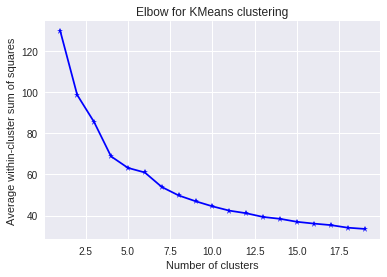

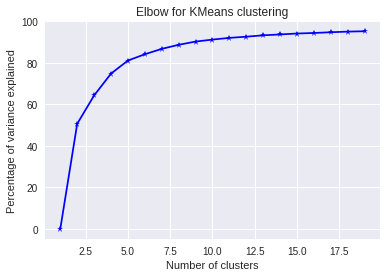

In [153]:
range_n_clusters = [2, 3, 4, 5, 6]
from sklearn.metrics import silhouette_samples, silhouette_score


#for n_clusters in range_n_clusters:
 #   clusterer = KMeans(n_clusters=n_clusters, random_state=324)
  #  cluster_labels = clusterer.fit_predict(cluster)
   # silhouette_avg = silhouette_score(cluster, cluster_labels)
    #print("For n_clusters =", n_clusters,
     #     "The average silhouette_score is :", silhouette_avg)
    #sample_silhouette_values = silhouette_samples(cluster, cluster_labels)
    
elbow(cluster,range(1,20))

In [154]:
clusterer = KMeans(n_clusters=5, random_state=324)
cluster_labels = clusterer.fit_predict(cluster)
cluster['cluster_labels'] = cluster_labels

In [155]:
cluster[cluster.cluster_labels == 0].describe()

,LocationID,day_x,hour_x,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWindSpeed,HOURLYWindGustSpeed,COUNTS,cluster_labels
count,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3345.0
mean,216.443647,16.173094,13.038565,8.243722,30.767414,6.901046,7.626308,54.005381,0.0
std,33.130946,9.049617,6.307890,3.212355,8.361614,4.223151,11.184550,37.355807,0.0
min,151.000000,1.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,0.0
25%,186.000000,8.000000,8.000000,9.000000,24.000000,5.000000,0.000000,22.000000,0.0
50%,230.000000,16.000000,14.000000,10.000000,32.000000,7.000000,0.000000,48.000000,0.0
75%,239.000000,24.000000,18.000000,10.000000,37.000000,9.000000,18.000000,83.000000,0.0
max,263.000000,31.000000,23.000000,10.000000,56.000000,21.000000,39.000000,146.000000,0.0


In [156]:
cluster[cluster.cluster_labels == 1].describe()

,LocationID,day_x,hour_x,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWindSpeed,HOURLYWindGustSpeed,COUNTS,cluster_labels
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.0
mean,172.304847,15.039541,14.894133,3.406569,34.721939,4.982143,3.028061,442.084184,1.0
std,59.727159,8.805387,5.726439,3.027090,6.802954,4.048201,7.998035,94.913434,0.0
min,48.000000,1.000000,0.000000,0.250000,10.000000,0.000000,0.000000,324.000000,1.0
25%,132.000000,6.000000,12.000000,1.500000,32.000000,3.000000,0.000000,364.000000,1.0
50%,162.000000,18.000000,16.000000,2.500000,37.000000,5.000000,0.000000,424.000000,1.0
75%,234.000000,22.000000,18.000000,4.000000,39.000000,7.000000,0.000000,505.000000,1.0
max,263.000000,31.000000,23.000000,10.000000,55.000000,20.000000,46.000000,690.000000,1.0


In [139]:
cluster[cluster.cluster_labels == 2].describe()

,day_x,hour_x,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWindSpeed,HOURLYWindGustSpeed,COUNTS,cluster_labels
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0
mean,15.348459,14.261130,4.465539,32.557363,5.818493,4.330479,293.549658,2.0
std,8.812197,6.135527,3.709592,7.663676,4.126276,9.143643,57.310779,0.0
min,1.000000,0.000000,0.250000,9.000000,0.000000,0.000000,216.000000,2.0
25%,7.000000,11.000000,1.500000,27.000000,3.000000,0.000000,243.000000,2.0
50%,16.000000,16.000000,2.750000,35.000000,6.000000,0.000000,284.000000,2.0
75%,24.000000,18.000000,10.000000,38.000000,8.000000,0.000000,344.000000,2.0
max,31.000000,23.000000,10.000000,55.000000,21.000000,39.000000,416.000000,2.0


In [140]:
cluster[cluster.cluster_labels == 3].describe()

,day_x,hour_x,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWindSpeed,HOURLYWindGustSpeed,COUNTS,cluster_labels
count,48.000000,48.00000,48.000000,48.000000,48.000000,48.0,48.000000,48.0
mean,17.375000,11.00000,1.932292,36.604167,3.187500,0.0,1118.916667,3.0
std,8.036155,8.83417,1.014181,3.057878,2.598332,0.0,251.203980,0.0
min,3.000000,0.00000,0.250000,32.000000,0.000000,0.0,864.000000,3.0
25%,12.000000,1.00000,1.000000,34.000000,0.000000,0.0,910.000000,3.0
50%,18.000000,15.00000,1.875000,36.500000,3.000000,0.0,966.000000,3.0
75%,24.000000,17.25000,3.000000,38.000000,5.000000,0.0,1363.500000,3.0
max,29.000000,23.00000,4.000000,42.000000,8.000000,0.0,1500.000000,3.0


In [141]:
cluster[cluster.cluster_labels == 4].describe()

,day_x,hour_x,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWindSpeed,HOURLYWindGustSpeed,COUNTS,cluster_labels
count,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.0
mean,16.467748,14.661637,6.503678,30.382497,6.848736,6.888344,137.385892,4.0
std,8.806087,6.091302,3.886231,8.127896,4.661943,11.200656,36.176278,0.0
min,1.000000,0.000000,0.000000,9.000000,0.000000,0.000000,87.000000,4.0
25%,9.000000,10.000000,2.500000,23.000000,3.000000,0.000000,105.000000,4.0
50%,17.000000,16.000000,10.000000,32.000000,7.000000,0.000000,132.000000,4.0
75%,24.000000,19.000000,10.000000,37.000000,9.000000,18.000000,164.000000,4.0
max,31.000000,23.000000,10.000000,56.000000,21.000000,39.000000,216.000000,4.0


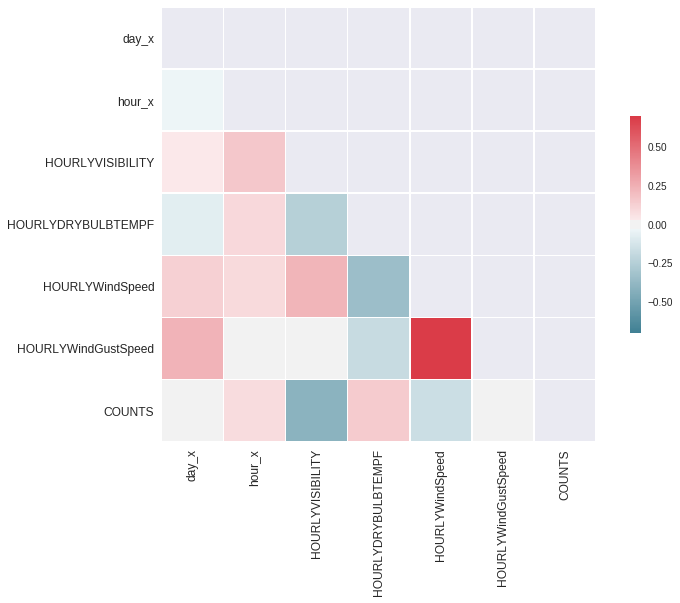

In [127]:
corr = cluster.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))
ax.set_xticklabels(corr.columns, rotation=90, size = 12 )
ax.set_yticklabels(corr.columns, rotation=90, size = 12 )

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.7,
            square=True, #xticklabels=2, yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)